In [1]:
from qiskit import *
from qiskit import Aer, transpile
from qiskit.visualization import plot_histogram
import numpy as np
from qiskit import IBMQ
from qiskit.converters import circuit_to_dag
import json
from qiskit.tools.monitor import job_monitor
%matplotlib inline

## Sbox circuit

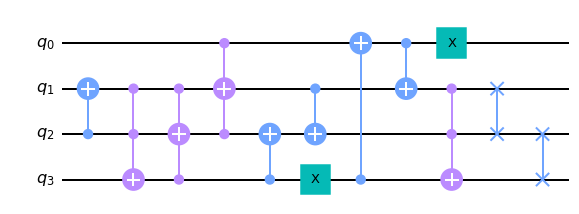

In [2]:
sbox = QuantumCircuit(4)
qubits = [
    [2,1],
    [1,2,3],
    [1,3,2],
    [0,2,1],
    [3,2],
    [1,2],
    [3],
    [3,0],
    [0,1],
    [0],
    [1,2,3],
]

for i in qubits:
    if len(i) == 1:
        sbox.x(i[0])
    elif len(i) == 2:
        sbox.cnot(i[0],i[1])
    elif len(i) == 3:
        sbox.toffoli(i[0],i[1],i[2])
    else:
        sbox.mct(i[:-1],i[-1])

sbox.swap(2,1)
sbox.swap(2,3)

sbox.draw('mpl')

## Verify sbox

In [5]:
sbox_actual = [12, 5, 6, 11, 9, 0, 10, 13, 3, 14, 15, 8, 4, 7, 1, 2]

shots = 10
simulator = Aer.get_backend('qasm_simulator')

for i in range(16):
    x = bin(i)[2:].zfill(4)[::-1]
    qc = QuantumCircuit(4)
    for index, j in enumerate(x):
        if j == '1':
            qc.x(index)
    qc = qc.compose(sbox)
    qc.measure_all()
    res = execute(qc,backend=simulator, shots=shots).result()
    counts = res.get_counts()
    out = list(counts.keys())[0]
    print(out)
    assert(int(out,2) == sbox_actual[i])
    del qc
print('Verified Sbox')

1100
0101
0110
1011
1001
0000
1010
1101
0011
1110
1111
1000
0100
0111
0001
0010
Verified Sbox


In [10]:
print("Sbox depth", sbox.depth())
print("Sbox width", sbox.width())
print("Sbox size", sbox.size())
print("Sbox gates", sbox.count_ops())

Sbox depth 11
Sbox width 4
Sbox size 13
Sbox gates OrderedDict([('cx', 5), ('ccx', 4), ('x', 2), ('swap', 2)])


In [8]:
with open('./latex/sbox.tex','w') as f:
    data = sbox.draw('latex_source')
    f.write(data)